In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [2]:
data = pd.read_csv('QueryResults_2.csv')

# Data preparation for text analysis

In [3]:
data = pd.read_csv('QueryResults_2.csv')

### Fonctions déstinée à la création du modèle Word2vec. 

In [4]:
def sentence_to_wordlist(sentence, remove_stopwords=False, remove_ponctuation=False,lemmatize = False):

    # 1. Remove HTML
    sentence = BeautifulSoup(sentence).get_text()
    sentence = re.sub("[^a-zA-Z+#]"," ", sentence)
    # 1. Tokenization des phrases en liste de mots. 
    words = sentence.split()    
    # 2. Lemmatisation des listes de mots(en option)
    if lemmatize:
        words = lemma_fct(words)
    
    # 3. Gestion des stopWords (en option)
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
        
    # 4. Gestion de la ponctuation (en option)
    if remove_ponctuation:
        ponct = ['[', ']', ',', '.', ':', '?', '(', ')','\'','\"','`']
        words = [w for w in words if not w in ponct]
    
    # 5. Return a list of words
    return(words)

In [5]:
def question_to_sentences(question, tokenizer):
    # Function to split a question into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    
    question = BeautifulSoup(question).get_text()
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(question.strip())
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append(sentence_to_wordlist(raw_sentence, remove_stopwords=False,\
                                                  remove_ponctuation=False, lemmatize=False))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [6]:
#tokenizer qui décompose en phrases via la ponctuation= punkt
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

## Gestion des TAGS ( cible ) 

In [7]:
def tag_remover(tag):
    tag = tag.replace('>' , " ").replace('<', " ")
    return tag

def tag_to_word_list(tag):
    tag = BeautifulSoup(tag).get_text()
    tag = tag.split()
    return(tag)

In [8]:
Tags = []
for tag in data.Tags:
    tag = tag_remover(tag)
    tag = tag_to_word_list(tag)
    Tags.append(tag)
    
tag_bank = [] 
for tag in Tags : 
    for y in tag:
        tag_bank.append(y)

/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


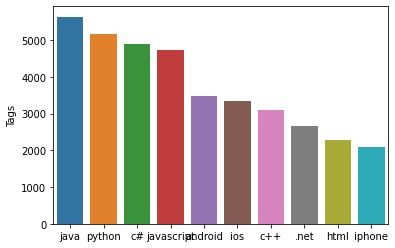

In [9]:
tags = pd.DataFrame()
tags['Tags'] = tag_bank
sns.barplot(tags['Tags'].value_counts().head(10).index,\
            tags['Tags'].value_counts().head(10))
top_ten = tags['Tags'].value_counts().head(10).index
top_ten_tags=[]
for i in range(len(top_ten)):
    top_ten_tags.append(top_ten[i])

In [10]:
tags['Tags'].value_counts().head(10).sum()

37339

In [11]:
#Création des data que nous utiliserons pour créer notre modèle supervisé
data_to_train = [] #--> X
target_to_train = [] #--> y
counter = 0
for tag in Tags:
    for i in tag:
        if i in top_ten_tags:            
            data_to_train.append(data.Body[counter])
            target_to_train.append(i)
            
            
    counter+=1

In [12]:
for tag in top_ten:
    print(tag)
    top_ten_tags.append(tag)

java
python
c#
javascript
android
ios
c++
.net
html
iphone


# WORD2VEC Model

In [13]:
sentences = []
for question in data['Body']:
    sentences += (question_to_sentences(question,tokenizer))

/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://stackoverflow.com/questions/66268/what-is-the-best-cc-coding-style-closed" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:337: MarkupResemblesLocatorWarning: "." looks like a directory name, not markup. You may want to open a file found in this directory and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://lists.webkit.org/pipermail/webkit-dev/2008-September/005019.html
https://lists.webkit.org/pipermail/webkit-dev/2009-June/008182.html" looks like a URL. Be

/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://www.uploadify.com/demos/
http://www.zamzar.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://cran.r-project.org/web/packages/gcbd/vignettes/gcbd.pdf." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://jsfiddle.net/RagKH/" looks like a URL. Beautiful Soup is not an HTTP c

/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://www.outlinenone.com/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://github.com/MarkNijhof/Fohjin
http://cre8ivethought.com/blog/2009/11/12/cqrs--la-greg-young/
http://cre8ivethought.com/blog/2009/11/28/cqrs-trying-to-make-it-re-usable/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarn

/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://github.com/parkwookyun/firebase-angular-board" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://en.cppreference.com/w/cpp/atomic/memory_order" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://jsfiddle.net/4wqEm/2/" looks like a URL. Beautiful Soup is not an HTTP client. You 

In [14]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count                        
num_workers = 5      # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            vector_size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)



2022-04-20 10:22:50,245 : INFO : collecting all words and their counts
2022-04-20 10:22:50,246 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-20 10:22:50,272 : INFO : PROGRESS: at sentence #10000, processed 207221 words, keeping 15582 word types
2022-04-20 10:22:50,302 : INFO : PROGRESS: at sentence #20000, processed 425732 words, keeping 24491 word types
2022-04-20 10:22:50,336 : INFO : PROGRESS: at sentence #30000, processed 646514 words, keeping 31823 word types
2022-04-20 10:22:50,369 : INFO : PROGRESS: at sentence #40000, processed 865619 words, keeping 38257 word types
2022-04-20 10:22:50,401 : INFO : PROGRESS: at sentence #50000, processed 1082188 words, keeping 43565 word types
2022-04-20 10:22:50,436 : INFO : PROGRESS: at sentence #60000, processed 1323559 words, keeping 50362 word types
2022-04-20 10:22:50,472 : INFO : PROGRESS: at sentence #70000, processed 1559511 words, keeping 56463 word types


Training model...


2022-04-20 10:22:50,507 : INFO : PROGRESS: at sentence #80000, processed 1786222 words, keeping 61530 word types
2022-04-20 10:22:50,542 : INFO : PROGRESS: at sentence #90000, processed 2016835 words, keeping 66985 word types
2022-04-20 10:22:50,578 : INFO : PROGRESS: at sentence #100000, processed 2261480 words, keeping 72396 word types
2022-04-20 10:22:50,613 : INFO : PROGRESS: at sentence #110000, processed 2506493 words, keeping 78145 word types
2022-04-20 10:22:50,648 : INFO : PROGRESS: at sentence #120000, processed 2749958 words, keeping 83330 word types
2022-04-20 10:22:50,686 : INFO : PROGRESS: at sentence #130000, processed 2987200 words, keeping 88033 word types
2022-04-20 10:22:50,720 : INFO : PROGRESS: at sentence #140000, processed 3203252 words, keeping 91876 word types
2022-04-20 10:22:50,755 : INFO : PROGRESS: at sentence #150000, processed 3423062 words, keeping 95689 word types
2022-04-20 10:22:50,793 : INFO : PROGRESS: at sentence #160000, processed 3653806 words, k

2022-04-20 10:23:06,318 : INFO : EPOCH 4 - PROGRESS: at 73.69% examples, 1414125 words/s, in_qsize 9, out_qsize 0
2022-04-20 10:23:07,318 : INFO : EPOCH 4 - PROGRESS: at 97.68% examples, 1426368 words/s, in_qsize 9, out_qsize 0
2022-04-20 10:23:07,397 : INFO : worker thread finished; awaiting finish of 4 more threads
2022-04-20 10:23:07,404 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-20 10:23:07,405 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-20 10:23:07,408 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-20 10:23:07,409 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-20 10:23:07,409 : INFO : EPOCH - 4 : training on 7482900 raw words (5890340 effective words) took 4.1s, 1430598 effective words/s
2022-04-20 10:23:08,425 : INFO : EPOCH 5 - PROGRESS: at 24.93% examples, 1398752 words/s, in_qsize 9, out_qsize 0
2022-04-20 10:23:09,435 : INFO : EPOCH 5 - PROGRESS: at 50.09% ex

## Embedding du modèle Word2Vec

In [15]:
def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index_to_key)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec,model.wv[word])
    # 
    
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0
    # 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")

    # 
    # Loop through the reviews
    for review in reviews:
       #
       # Print a status message every 1000th review
        if counter%1000. == 0.:
            print ("Review %d of %d" % (counter, len(reviews)))
       # 
       # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
       #
       # Increment the counter
        counter = counter + 1
    return reviewFeatureVecs

In [16]:
# ****************************************************************
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.

clean_train_questions = []
# Ici, data_to_train a été défini dans la partie "Gestion des Tags". Cela correspond aux données avec 
# au moins 1 des 10 tags les plus récurents. C'est sur ces données que l'on va entrainer notre modèle supervisé. 
for question in data_to_train:
    clean_train_questions.append(sentence_to_wordlist( question, \
        remove_stopwords=True ))
    
print ("Creating average feature vecs for test questions")
trainDataVecs = getAvgFeatureVecs(clean_train_questions, model, num_features)

Creating average feature vecs for test questions
Review 0 of 37339
Review 1000 of 37339
Review 2000 of 37339
Review 3000 of 37339
Review 4000 of 37339
Review 5000 of 37339
Review 6000 of 37339
Review 7000 of 37339
Review 8000 of 37339
Review 9000 of 37339
Review 10000 of 37339
Review 11000 of 37339
Review 12000 of 37339
Review 13000 of 37339
Review 14000 of 37339
Review 15000 of 37339
Review 16000 of 37339
Review 17000 of 37339
Review 18000 of 37339
Review 19000 of 37339
Review 20000 of 37339
Review 21000 of 37339
Review 22000 of 37339
Review 23000 of 37339
Review 24000 of 37339
Review 25000 of 37339
Review 26000 of 37339
Review 27000 of 37339
Review 28000 of 37339
Review 29000 of 37339
Review 30000 of 37339
Review 31000 of 37339
Review 32000 of 37339
Review 33000 of 37339
Review 34000 of 37339
Review 35000 of 37339
Review 36000 of 37339
Review 37000 of 37339


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
target_to_train_encoded = label_encoder.fit_transform(target_to_train)

X_train, X_test, y_train, y_test = train_test_split(trainDataVecs,target_to_train_encoded,test_size=0.3)

In [114]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

model_to_set = OneVsRestClassifier(SVC())

parameters = {
    "estimator__C": [1],
    "estimator__kernel":["poly","rbf"],
    "estimator__degree":[1, 2],
}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters,cv= 5,verbose = 4, scoring = 'f1_micro',n_jobs=-1)
model_tunning.fit(X_train[:10000], y_train[:10000])

print (model_tunning.best_score_)
print (model_tunning.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.6743
{'estimator__C': 1, 'estimator__degree': 2, 'estimator__kernel': 'poly'}


In [115]:
model_tunning.score(X_test[:1000],y_test[:1000])

0.69

[CV 4/5] END estimator__C=0.9, estimator__kernel=rbf;, score=0.670 total time=   0.4s
[CV 4/5] END estimator__C=1, estimator__kernel=rbf;, score=0.675 total time=   0.4s
[CV 2/5] END estimator__C=1.2, estimator__kernel=rbf;, score=0.630 total time=   0.3s
[CV 4/5] END estimator__C=3, estimator__kernel=rbf;, score=0.620 total time=   0.3s
[CV 2/5] END estimator__C=0.1, estimator__degree=1, estimator__kernel=rbf;, score=0.620 total time=   0.3s
[CV 1/5] END estimator__C=0.1, estimator__degree=2, estimator__kernel=rbf;, score=0.610 total time=   0.3s
[CV 4/5] END estimator__C=0.1, estimator__degree=3, estimator__kernel=rbf;, score=0.670 total time=   0.3s
[CV 1/5] END estimator__C=0.01, estimator__degree=2, estimator__kernel=poly;, score=0.590 total time=   0.2s
[CV 4/5] END estimator__C=0.01, estimator__degree=2, estimator__kernel=rbf;, score=0.670 total time=   0.3s
[CV 1/5] END estimator__C=1, estimator__degree=1, estimator__kernel=poly;, score=0.615 total time=   0.2s
[CV 1/5] END est

[CV 1/5] END estimator__C=0.9, estimator__kernel=poly;, score=0.585 total time=   0.3s
[CV 1/5] END estimator__C=1, estimator__kernel=poly;, score=0.595 total time=   0.3s
[CV 5/5] END estimator__C=1, estimator__kernel=rbf;, score=0.620 total time=   0.4s
[CV 3/5] END estimator__C=3, estimator__kernel=poly;, score=0.640 total time=   0.3s
[CV 4/5] END estimator__C=0.1, estimator__degree=1, estimator__kernel=poly;, score=0.655 total time=   0.2s
[CV 4/5] END estimator__C=0.1, estimator__degree=2, estimator__kernel=poly;, score=0.640 total time=   0.2s
[CV 2/5] END estimator__C=0.1, estimator__degree=3, estimator__kernel=poly;, score=0.615 total time=   0.3s
[CV 3/5] END estimator__C=0.1, estimator__degree=3, estimator__kernel=rbf;, score=0.625 total time=   0.3s
[CV 4/5] END estimator__C=0.01, estimator__degree=2, estimator__kernel=poly;, score=0.645 total time=   0.2s
[CV 4/5] END estimator__C=0.01, estimator__degree=3, estimator__kernel=poly;, score=0.620 total time=   0.2s
[CV 3/5] E

[CV 2/5] END estimator__C=0.9, estimator__kernel=rbf;, score=0.620 total time=   0.4s
[CV 3/5] END estimator__C=1, estimator__kernel=rbf;, score=0.630 total time=   0.4s
[CV 5/5] END estimator__C=1.2, estimator__kernel=rbf;, score=0.625 total time=   0.4s
[CV 1/5] END estimator__C=0.1, estimator__degree=1, estimator__kernel=poly;, score=0.600 total time=   0.2s
[CV 1/5] END estimator__C=0.1, estimator__degree=2, estimator__kernel=poly;, score=0.600 total time=   0.2s
[CV 3/5] END estimator__C=0.1, estimator__degree=3, estimator__kernel=poly;, score=0.640 total time=   0.2s
[CV 2/5] END estimator__C=0.1, estimator__degree=3, estimator__kernel=rbf;, score=0.620 total time=   0.3s
[CV 2/5] END estimator__C=0.01, estimator__degree=2, estimator__kernel=poly;, score=0.620 total time=   0.2s
[CV 2/5] END estimator__C=0.01, estimator__degree=3, estimator__kernel=poly;, score=0.605 total time=   0.2s
[CV 2/5] END estimator__C=0.01, estimator__degree=3, estimator__kernel=rbf;, score=0.610 total 

In [69]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

#Avec Probas :
clf = OneVsRestClassifier(SVC(probability=False))
clf.fit(X_train[:1000], y_train[:1000])

#Sans Probas : 
#clf = OneVsRestClassifier(SVC(probability=False)).fit(X_train, y_train)



OneVsRestClassifier(estimator=SVC())

In [88]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

#Avec Probas :
clf = OneVsRestClassifier(SVC(probability=False))
clf.fit(X_train[:10000], y_train[:10000])

#Sans Probas : 
#clf = OneVsRestClassifier(SVC(probability=False)).fit(X_train, y_train)



OneVsRestClassifier(estimator=SVC())

In [93]:
clf.get_params()

{'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None}

In [81]:
clf.score(X_test[:5000],y_test[:5000])

0.668

In [82]:
clf.score(X_train,y_train)

0.6845100599243413

### Pipeline

### Créons une pipeline afin de faciliter la prédiction de notre notre modèle. 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
target_to_train_encoded = label_encoder.fit_transform(target_to_train)

X_train, X_test, y_train, y_test = train_test_split(data_to_train,target_to_train_encoded,test_size=0.3)

In [29]:
len(target_to_train_encoded)

37339

In [30]:
def cleaning_question_W2V(data_to_train):
    
    clean_train_questions = []
    # Ici, data_to_train a été défini dans la partie "Gestion des Tags". Cela correspond aux données avec 
    # au moins 1 des 10 tags les plus récurents. C'est sur ces données que l'on va entrainer notre modèle supervisé. 
    for question in data_to_train:
        clean_train_questions.append(sentence_to_wordlist( question, \
            remove_stopwords=True ))
    
    print ("Creating average feature vecs for test questions")
    trainDataVecs = getAvgFeatureVecs(clean_train_questions, model, num_features)
    return trainDataVecs

# Création d'un transformeur, permettant d'intégrer notre fonction dans la pipeline. 

from sklearn.preprocessing import FunctionTransformer
transformer_2 = FunctionTransformer(cleaning_question_W2V)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

### Création de la pipeline 

In [32]:
pipeline = Pipeline([
   ('transformer', transformer_2), ('clf',OneVsRestClassifier(SVC(probability=True))), 
])

In [ ]:
pipeline.fit(X_train, y_train)

# API

In [ ]:
## from fast_dash import FastDash
from fast_dash.Components import Text

# Step 1: Define your model inference
def text_to_text_function(question):
    result = []
    result_2  = []
    probas = []
    #result = pipeline.predict([question])
    #result = label_encoder.inverse_transform(result)[0]
    result_proba = pipeline.predict_proba([question])
    print(result_proba)
    for idx, prob in enumerate(result_proba[0]) : 
        if prob > 0.1:
            result.append(idx)
            probas.append(probas)
    print(result)
    result = label_encoder.inverse_transform(result)
    
    """for idx,i in enumerate(result) : 
        result_2.append(i)
        result_2.append(probas[idx] )
    print(result)"""
    
    return result

# Step 2: Specify the input and output components
app = FastDash(callback_fn=text_to_text_function, 
                inputs=Text, 
                outputs=Text, 
                title='App title')

# Step 3: Run your app!
app.run()

# * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)